# TP : parcourir un graphe

On considère le graphe G défini par son dictionnaire d'adjacence :

```python
G = {
    'A':{'B','C'},\
    'B':{'A','C'},\
    'C':{'A','B','D'},\
    'D':{'C'}
}
```

In [1]:
from _graphe import Graphe
from _pile import Pile, creer_pile
from _file import File, creer_file

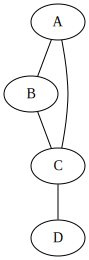

In [14]:
G0 = Graphe()
G0.ajouter_sommet('A')
G0.ajouter_adjacent('A','B')
G0.ajouter_adjacent('A','C')
G0.ajouter_adjacent('B','C')
G0.ajouter_adjacent('C','D')
G0.afficher()

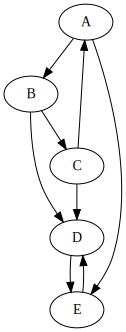

In [17]:
G1 = Graphe(oriente=True)
G1.ajouter_sommet('A')
G1.ajouter_adjacent('A','B')
G1.ajouter_adjacent('A','E')
G1.ajouter_adjacent('B','C')
G1.ajouter_adjacent('B','D')
G1.ajouter_adjacent('C','A')
G1.ajouter_adjacent('C','D')
G1.ajouter_adjacent('D','E')
G1.ajouter_adjacent('E','D')
G1.afficher()

{'A': ['B', 'C'], 'B': ['C'], 'C': ['A', 'D', 'E'], 'D': ['E'], 'E': ['A', 'B']}
[[0, 1, 1, 0, 0], [0, 0, 1, 0, 0], [1, 0, 0, 1, 1], [0, 0, 0, 0, 1], [1, 1, 0, 0, 0]]


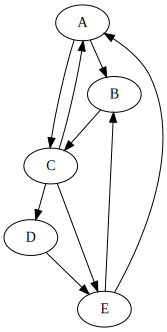

In [19]:
G2 = Graphe(oriente=True)
G2.liste = {'A':['B','C'],\
           'B':['C'],\
           'C':['A','D','E'],\
           'D':['E'],\
           'E':['A','B']}

print(G2.liste)
M = G2.matrice()
print(M)
G2.afficher()

In [21]:
"""
Parcours en profondeur d'un graphe:
- G est un objet graphe de type Graphe
- s est un sommet du graphe G
"""

def parcours_profondeur(g,s):
    """
    on crée une liste vus qui recense les sommets visités;
    on choisit un sommet s, on l'ajoute à la liste vus;
    on empile les sommets v voisins du sommet s
    tant que la pile n'est pas vide:
    -> soit le voisin v a déjà été visité, il est dans vus, on continue
    -> soit il n'a pas été visité, on l'ajoute et on empile ses voisins
    """
    vus=[]
    p=creer_pile()
    p.empiler(s)
    while not p.est_vide():
        s=p.depiler()
        if s not in vus:
            vus.append(s)
            for v in g.liste[s]:
                p.empiler(v)
    return vus

In [22]:
parcours_profondeur(G0,'A')

['A', 'C', 'D', 'B']

In [23]:
parcours_profondeur(G1,'A')

['A', 'E', 'D', 'B', 'C']

In [24]:
parcours_profondeur(G2,'A')

['A', 'C', 'E', 'B', 'D']

### Graphe H

```python
H={'A':{'B','C'},\
   'B':{'A','E'},\
   'C':{'A','E'},\
   'D':{'F'},\
   'E':{'B','C','F'},\
   'F':{'D','E'}\
   }
```

### Graphe K

```
K={'A':{'E','C'},\
   'B':{'D','E','I'},\
   'C':{'F','L'},\
   'D':{'B','E','I'},\
   'E':{'B','D'},\
   'F':{'L'},\
   'G':{'J','H'},\
   'H':{'J','G'},\
   'I':{'B','D'},\
   'J':{'H','G'},\
   'L':{'C','F'}
  }
```

In [25]:
def chemin(g,s1,s2):
    p = parcours_profondeur(g,s1)
    if s2 in p:
        return p
    else:
        return []

In [28]:
chemin(G0,'A','D')

['A', 'C', 'D', 'B']

In [6]:
"""
Parcours en largeur d'un graphe:
- g est un objet graphe de type classe Graphe
- s est un sommet du graphe g
"""

def parcours_largeur(g,s):
    """
    on détermine la distance de tous les sommets à un sommet s
    """
    dist={s:0}
    courant={s}
    suivant=set()
    while len(courant) > 0:
        sommet = courant.pop()
        for v in g.liste[sommet]:
            if v not in dist:
                suivant.add(v)
                dist[v] = dist[sommet] + 1
            else:
                if dist[v] > dist[sommet] + 1:
                    dist[v] = dist[sommet] + 1
            if len(courant)==0:
                courant,suivant=suivant,set()
    return dist

In [7]:
F = creer_file()
F.enfiler(3)
F.enfiler(7)
print(F)

3 < 7 < ...


In [8]:
"""
Parcours en largeur d'un graphe:
- g est un objet graphe de type classe Graphe
- s est un sommet du graphe g
"""

def parcours_largeur2(g,s):
    """
    on détermine la distance de tous les sommets à un sommet s
    """
    dist={s:0}
    courant = creer_file()
    courant.enfiler(s)
    suivant = creer_file()
    while not courant.est_vide():
        sommet = courant.defiler()
        for v in g.liste[sommet]:
            if v not in dist:
                suivant.enfiler(v)
                dist[v] = dist[sommet] + 1
            else:
                if dist[v] > dist[sommet] + 1:
                    dist[v] = dist[sommet] + 1
            if len(courant)==0:
                while not suivant.est_vide():
                    courant.enfiler(suivant.defiler())
    return dist

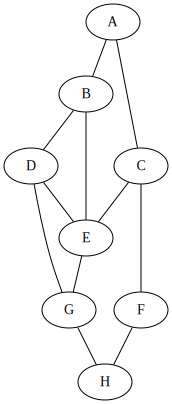

In [9]:
# Dictionnaire d'adjacence du graphe G
L={'A':['B','C'],\
   'B':['A','D','E'],\
   'C':['A','E','F'],\
   'D':['B','E','G'],\
   'E':['B','C','D','G'],\
   'F':['C','H'],\
   'G':['D','E','H'],\
   'H':['G','F']
  }

# Conversion du dictionnaire en objet graphe
# Exemple 1:
G=Graphe()
G.liste=L
G.afficher()

In [10]:
parcours_largeur(G,'A')

{'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 2, 'G': 3, 'H': 3}

In [11]:
parcours_largeur2(G,'A')

{'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 2, 'G': 3, 'H': 3}

In [48]:
def distance(g,s1,s2):
    d = parcours_largeur2(g,s1)
    return d[s2]
 
distance(G,'A','H')

3

In [37]:
chemin(G,'A','H')

['A', 'C', 'F', 'H', 'G', 'E', 'D', 'B']

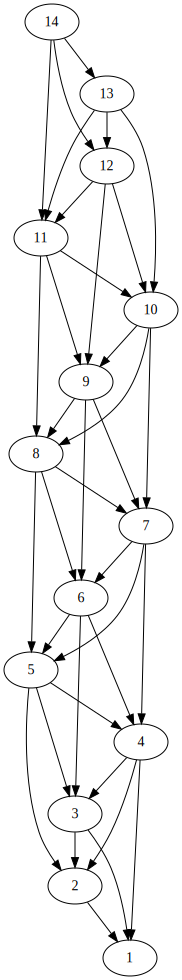

In [18]:
jeu_nim=Graphe(True)
for i in range(1,15):
    jeu_nim.ajouter_sommet(i)
for i in range(4,15):
    jeu_nim.ajouter_adjacent(i,i-1)
    jeu_nim.ajouter_adjacent(i,i-2)
    jeu_nim.ajouter_adjacent(i,i-3)
jeu_nim.ajouter_adjacent(3,2)
jeu_nim.ajouter_adjacent(3,1)
jeu_nim.ajouter_adjacent(2,1)
jeu_nim.afficher()

In [41]:
G3 = Graphe()
G3.liste = {'A':{'B','C'},\
            'B':{'A','E'},\
            'C':{'A','E'},\
            'D':{'F'},\
            'E':{'B','C','F'},\
            'F':{'D','E'}\
           }

In [42]:
G4 = Graphe()
G4.liste = {'A':{'E','C'},\
            'B':{'D','E','I'},\
            'C':{'F','L'},\
            'D':{'B','E','I'},\
            'E':{'B','D'},\
            'F':{'L'},\
            'G':{'J','H'},\
            'H':{'J','G'},\
            'I':{'B','D'},\
            'J':{'H','G'},\
            'L':{'C','F'}
           }

In [16]:


# Exemple 2:
#H=dict_to_graphe(H)
#H.afficher().view()

# Exemple 3:
#print(chemin(K,'A','G'))


# parcours profondeur sous forme de liste
#p0=parcours_profondeur(K,'G')
#p1=parcours_profondeur(H,'A')
# parcours en largeur depuis un sommet vers tous les autres
l0=parcours_largeur2(G,'H')
#l1=parcours_largeur(H,'A')

In [17]:
l0

{'H': 0, 'G': 1, 'F': 1, 'D': 2, 'E': 2, 'C': 2, 'B': 3, 'A': 3}